In [2]:
import tensorflow as tf

from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
#book
class1_data = []
#apple
class2_data = []
with open('/content/drive/MyDrive/CERN ONN/chirp2.npy', "rb") as file:
    class1_data = np.load(file);
    class1_data = class1_data
    print(len(class1_data))

with open('/content/drive/MyDrive/CERN ONN/whistle_feb_20.npy', "rb") as file2:
    class2_data = np.load(file2);
    class2_data = class2_data[:240]
    print(len(class2_data))

240
240


In [36]:
class1_labels = np.zeros(len(class1_data))
class2_labels = np.ones(len(class2_data))

In [37]:
# Combine data and labels
X = np.concatenate((class1_data, class2_data), axis=0)
y = np.concatenate((class1_labels, class2_labels), axis=0)

In [38]:

from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



In [40]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 200, 200, 1)  # Add the channel dimension (1 for grayscale)
X_test = X_test.reshape(-1, 200, 200, 1)


In [41]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(1, (10,10), activation='relu', input_shape=(200,200,1)),
    keras.layers.MaxPooling2D(3,3),
#     keras.layers.Conv2D(1, (10,10), activation='relu'),
#     keras.layers.MaxPooling2D(3,3),
#     keras.layers.Conv2D(1, (10,10), activation='relu'),
#     keras.layers.MaxPooling2D(3,3),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop


# keras.applications.DenseNet121(
#     include_top= False,
#     weights= None,
#     input_tensor=None,
#     input_shape=(150,94),
#     pooling = avg,
#     classes=2,
#     classifier_activation="sigmoid",
# )

In [42]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.0001),
             metrics=['acc'])

In [43]:
batch_size = 1
num_classes = 1
epochs = 10
history = model.fit(X_train, y_train.reshape(432,1),
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, y_test))

Epoch 1/10
432/432 [==============================] - 28s 63ms/step - loss: 0.4005 - acc: 0.8657 - val_loss: 0.1420 - val_acc: 1.0000
Epoch 2/10
432/432 [==============================] - 21s 49ms/step - loss: 0.0706 - acc: 0.9884 - val_loss: 0.0298 - val_acc: 1.0000
Epoch 3/10
432/432 [==============================] - 23s 54ms/step - loss: 0.0324 - acc: 0.9954 - val_loss: 0.0192 - val_acc: 1.0000
Epoch 4/10
432/432 [==============================] - 23s 53ms/step - loss: 0.0161 - acc: 0.9977 - val_loss: 0.0147 - val_acc: 1.0000
Epoch 5/10
432/432 [==============================] - 26s 60ms/step - loss: 0.0174 - acc: 0.9954 - val_loss: 0.0106 - val_acc: 1.0000
Epoch 6/10
432/432 [==============================] - 21s 48ms/step - loss: 0.0116 - acc: 0.9954 - val_loss: 0.0117 - val_acc: 1.0000
Epoch 7/10
432/432 [==============================] - 22s 51ms/step - loss: 0.0123 - acc: 0.9977 - val_loss: 0.0093 - val_acc: 1.0000
Epoch 8/10
432/432 [==============================] - 21s 49ms

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


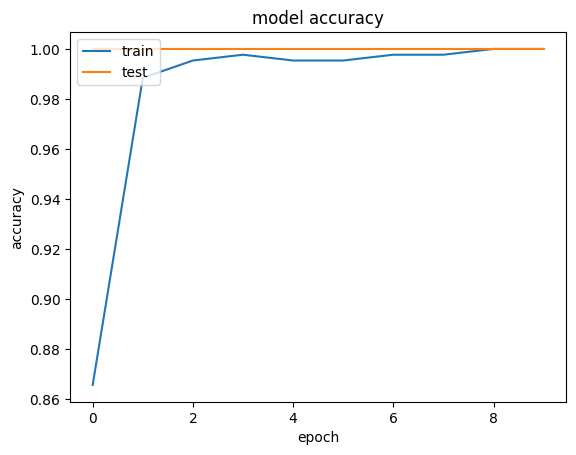

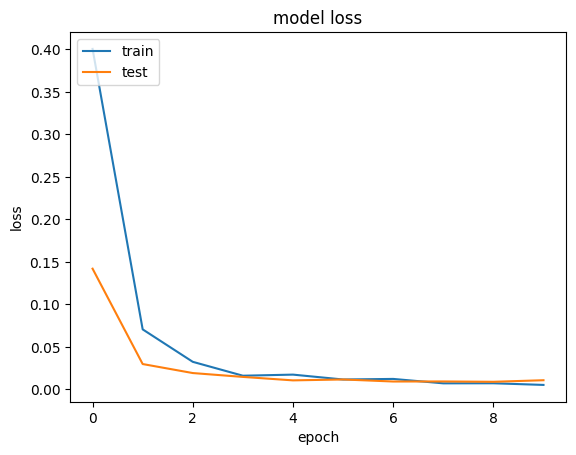

In [64]:
import keras
from matplotlib import pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 191, 191, 1)       101       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 1)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3969)              0         
                                                                 
 dense_4 (Dense)             (None, 16)                63520     
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 63638 (248.59 KB)
Trainable params: 63638 (248.59 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [46]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

2/2 [==============================] - 1s 142ms/step - loss: 0.0108 - acc: 1.0000
Test Loss: 0.0108
Test Accuracy: 100.00%


In [47]:
import numpy as np
from tensorflow.keras import metrics
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
import tensorflow as tf

In [48]:
weights = model.get_weights()

In [49]:
def zero_pad(img, pad):

    img_pad = np.pad(img, ((0,0), (pad, pad), (pad, pad), (0,0)), 'constant', constant_values = 0)
    return img_pad

In [50]:
def conv_single_step(a_slice_prev, W, b):

    s = np.sum(np.multiply(a_slice_prev, W)) + float(b)
    return s

In [51]:
def pool_forward(A_prev, hparameters, mode = "max"):

    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    f = hparameters["f"]
    stride = hparameters["stride"]

    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    A = np.zeros((m, n_H, n_W, n_C))

    for i in range(m):
        for h in range(n_H):
            for w in range(n_W):
                for c in range (n_C):

                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f

                    a_prev_slice = A_prev[i,vert_start:vert_end,horiz_start:horiz_end,c]
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

    cache = (A_prev, hparameters)

    assert(A.shape == (m, n_H, n_W, n_C))

    return A, cache

In [52]:
def relu(X):
   return np.maximum(0,X)
def sigmoid(X):
   return 1/(1+np.exp(-X))

In [53]:
print(np.array(weights[0]).shape)

(10, 10, 1, 1)


In [54]:
def fft_forward(img,w, b, hparameters1):

    l = img.shape[1]
#     print(l)
    pa = (l - 10) // 2
    f2 = np.pad(w.reshape(10,10), (pa,pa))
    img = img.reshape(l,l)

    if l % 2 == 0:
        l = l-1
        img = img[:l,:l]
        f2 = f2[:l,:l]

        f = np.fft.fft2(img)

        f21 = np.fft.fft2(f2)

#         l2 = len(f)
#         l3 = len(f21)

#         f = reshape_spectrogram_to_square(f, max(l2,l3))
#         f21 = reshape_spectrogram_to_square(f21, max(l2,l3))

        aaa = f * f21
        final = np.fft.ifft2(aaa)
#         print(l)
#         print(final.shape)
        zeros = np.zeros((l,l))
        zeros[1:l // 2+1,1:l // 2+1] = final.real[l // 2+1:,l // 2+1:]
        zeros[1:l // 2+1,l // 2+1:] = final.real[l // 2+1:,1:l // 2+1]
        zeros[l // 2+1:,1:l // 2+1] = final.real[1:l // 2+1,l // 2+1:]
        zeros[l // 2+1:,l // 2+1:] = final.real[1:l // 2+1,1:l // 2+1]

        zeros = zeros[1:l,1:l] + b

    else:
        f = np.fft.fft2(img)
        f21 = np.fft.fft2(f2)
        aaa = f * f21
        final = np.fft.ifft2(aaa)

        zeros = np.zeros((l,l))
        zeros[1:l // 2+1,1:l // 2+1] = final.real[l // 2+1:,l // 2+1:]
        zeros[1:l // 2+1,l // 2+1:] = final.real[l // 2+1:,1:l // 2+1]
        zeros[l // 2+1:,1:l // 2+1] = final.real[1:l // 2+1,l // 2+1:]
        zeros[l // 2+1:,l // 2+1:] = final.real[1:l // 2+1,1:l // 2+1]

        zeros = zeros[1:l-1,1:l-1] + b
    return zeros

In [55]:
def fft_model(img, weights, hparameters1, hparameters2):
    fft = relu(fft_forward(img, weights[0], weights[1], hparameters1))
    print(np.array(fft).shape)
    pool2 = pool_forward(fft.reshape(1,148,148,1), hparameters2)[0]
    print(np.array(pool2).shape)

#     print(pool2.shape)
#     fft1 = relu(fft_forward(pool, weights[2], weights[3], hparameters1))
#     pool1 = pool_forward(fft1.reshape(1,fft1.shape[1],fft1.shape[1],1), hparameters2)[0]
#     fft2 = relu(fft_forward(pool1, weights[4], weights[5], hparameters1))
#     pool2 = pool_forward(fft2.reshape(1,fft2.shape[1],fft2.shape[1],1), hparameters2)[0]

    flatten = pool2.reshape(1,pool2.shape[1]*pool2.shape[2]*pool2.shape[3])
    print(np.array(flatten).shape)

#     pool2.shape[1]*pool2.shape[2]*pool2.shape[3]
#     print(pool2.shape[3])
#     print(np.array(weights[2]).shape)
#     print(np.array(weights[3]).shape)
#     print(np.array(flatten).shape)
#     print(np.dot(flatten, weights[2]).shape)
    neural_net = relu(np.dot(flatten, weights[2]) + weights[3])

    ans = sigmoid(np.dot(neural_net, weights[4]) + weights[5])

#     tup = (ans, fft, pool, fft1, pool1, fft2, pool2)
    tup = ans
    return tup

In [56]:
def extract_layers(main_model, starting_layer_ix, ending_layer_ix):
  # create an empty model
  new_model = Sequential()
  for ix in range(starting_layer_ix, ending_layer_ix + 1):
    curr_layer = main_model.get_layer(index=ix)
    # copy this layer over to the new model
    new_model.add(curr_layer)
  return new_model

new_model = extract_layers(model, 1, 4)

In [57]:
def new_fft_model(img, weights, hparameters1, hparameters2):
    fft = relu(fft_forward(img, weights[0], weights[1], hparameters1))
    print(np.array(fft).shape)
    fft = fft[4:195, 4:195]
    print(fft.shape)
    tup = new_model.predict(fft.reshape(1,191,191,1))

    return tup

In [58]:
hparameters1 = {
    'stride':1,
    'pad':0
}
hparameters2 = {
    'stride':2,
    'f':2
}
weights = model.get_weights()
print(type(weights))

<class 'list'>


In [ ]:
# fft_out = []
# count = 0
# for i in range(len(X_test)):
#   img = cv2.resize(X_test[i],(28,28)).reshape(1,28,28,1)
#   output1 = fft_model(img, weights, hparameters1, hparameters2)
#   # print(output1[0])
#   if output1[0] >= 0.5:
#     pred = 1
#   else:
#     pred = 0
#   if pred == y_test[i]:
#       count +=1
# print(count/len(X_test))


# end = time.time()
# print('Time taken by FFT to predict class for 253 images is', end - start)

In [ ]:
print(X_test.shape)

(200, 150, 150, 1)


In [ ]:
print(np.array(weights).shape)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.

In [ ]:
from PIL import Image

# Assuming X_test contains images
fft_out = []
count = 0
for i in range(len(X_test)):
    # Resize image using PIL
    img_pil = Image.fromarray(X_test[i,:,:,0])
    img_pil = img_pil.resize((150, 150))

    # Convert resized image to numpy array and reshape
    img = np.array(img_pil).reshape(1, 150, 150, 1)

#     output1 = fft_model(img, weights, hparameters1, hparameters2)


    if output1[0] >= 0.5:
        pred = 1
    else:
        pred = 0
    if pred == y_test[i]:
        count += 1

print(count/len(X_test))

NameError: name 'output1' is not defined

In [ ]:
print(len(weights[3]))

16


# Evaluating with extracted model

In [59]:
from PIL import Image

# Assuming X_test contains images
fft_out = []
count = 0
for i in range(len(X_test)):
    # Resize image using PIL
    img_pil = Image.fromarray(X_test[i,:,:,0])
    img_pil = img_pil.resize((200, 200))

    # Convert resized image to numpy array and reshape
    img = np.array(img_pil).reshape(1, 200, 200, 1)

    output1 = new_fft_model(img, weights, hparameters1, hparameters2)


    if output1[0] >= 0.5:
        pred = 1
        fft_out.append(1)
    else:
        pred = 0
        fft_out.append(0)
    if pred == y_test[i]:
        count += 1

print(count/len(X_test))

(198, 198)
(191, 191)
1/1 [==============================] - 0s 78ms/step
(198, 198)
(191, 191)
1/1 [==============================] - 0s 40ms/step
(198, 198)
(191, 191)
1/1 [==============================] - 0s 24ms/step
(198, 198)
(191, 191)
1/1 [==============================] - 0s 23ms/step
(198, 198)
(191, 191)
1/1 [==============================] - 0s 41ms/step
(198, 198)
(191, 191)
1/1 [==============================] - 0s 20ms/step
(198, 198)
(191, 191)
1/1 [==============================] - 0s 30ms/step
(198, 198)
(191, 191)
1/1 [==============================] - 0s 23ms/step
(198, 198)
(191, 191)
1/1 [==============================] - 0s 23ms/step
(198, 198)
(191, 191)
1/1 [==============================] - 0s 22ms/step
(198, 198)
(191, 191)
1/1 [==============================] - 0s 24ms/step
(198, 198)
(191, 191)
1/1 [==============================] - 0s 23ms/step
(198, 198)
(191, 191)
1/1 [==============================] - 0s 23ms/step
(198, 198)
(191, 191)
1/1 [===========

In [60]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, fft_out)

array([[23,  0],
       [ 0, 25]])

In [63]:
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

recall_score(y_test, fft_out, pos_label=0)

1.0

# Checking if fet_maps are equal

In [ ]:
img_pil = Image.fromarray(X_test[0,:,:,0])
img_pil = img_pil.resize((150, 150))

# Convert resized image to numpy array and reshape
img = np.array(img_pil).reshape(1, 150, 150, 1)

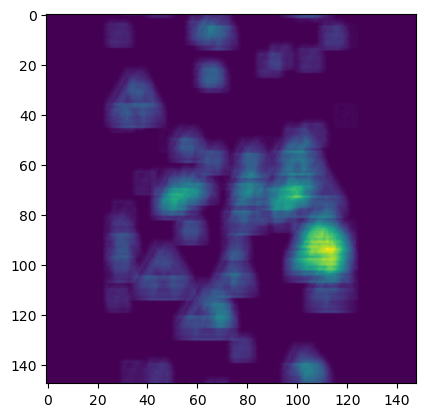

In [ ]:
HOC_fet_map = fft_forward(img,weights[0], weights[1], hparameters1)

plt.imshow(HOC_fet_map)

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
model_maps = Model(inputs=model.inputs, outputs=model.layers[0].output)

Ximage = X_test[0]
fet_maps = model_maps.predict(Ximage.reshape(1,150,150,1))

1/1 [==============================] - 0s 395ms/step


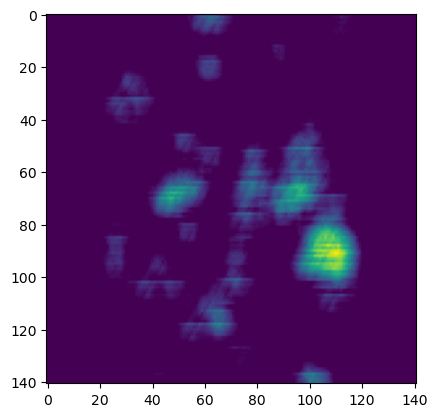

In [ ]:
plt.imshow(fet_maps[0,:,:,0])

In [ ]:
print(fet_maps[0,:,:,0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
fet_maps1 = fet_maps[0,:,:,0]

fet_maps1 = fet_maps1[0:140, 35:120]

In [ ]:
print(np.sum(fet_maps1)/(140*85))

0.004163328539423582


In [ ]:
print(np.sum(HOC_fet_map[0:140, 35:120])/(140*85))

-0.002507958261619644


In [ ]:
print(fet_maps1.shape)

(140, 85)
